# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [3]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
import re
import time
import pickle

from sqlalchemy import create_engine 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV , ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [23]:
nltk.download(['punkt','wordnet','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stop_english=stopwords.words('english')

In [4]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')
df = pd.read_sql_table('Text_clean',engine)

In [9]:
# I it is not clear, wether 2 are typos or a subgroup. 
df['related'].value_counts()

1    19906
0     6122
2      188
Name: related, dtype: int64

In [7]:
df.query("related==2")

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,263,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,373,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,565,"Bonsoir, on est a bon repos aprs la compagnie ...",Bonswa nou nan bon repo apri teleko nan wout t...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,700,URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX ...,r et Salon Furterer. mwen se yon Cosmtologue. ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,1063,no authority has passed by to see us. We don't...,EN OKENN OTORITE POKO PASE WE NOU NOU PAGEN KO...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,1080,It's Over in Gressier. The population in the a...,Se over toujou nan gresye 24e seksyon komin. P...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
924,1113,we sleep with the baby. Thanks in advance for ...,sa nou demi avek ti bebe. Mesi davans pou d no...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,1121,I need help in Jrmie because I was in Port-au-...,MWEN bezwen ed lan jeremi paske mwen te portop...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['message']

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
5                   Information about the National Palace-
6                           Storm at sacred heart of jesus
7        Please, we need tents and water. We are in Sil...
8          I would like to receive the messages, thank you
9        I am in Croix-des-Bouquets. We have health iss...
10       There's nothing to eat and water, we starving ...
11       I am in Petionville. I need more information r...
12       I am in Thomassin number 32, in the area named...
13       Let's do it together, need food in Delma 75, i...
14       More information on the 4636 number in order f...
15       A Comitee in Delmas 19, Rue ( street ) Janvier...
16       We need food and water in Klecin 12. We are dy.

In [11]:
# Defining features 
X=df['message']
Y=df.drop(['id','message','original','genre'],axis=1)
#Inspecting Dataset
Y.head(5)

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I assume, that relatd has typos (fields with 2 instead of 1). I am going to change the values 2 to 1.

In [12]:
# Changing the values
Y['related']=np.where(Y['related']==2,1,Y['related'])
Y['related'].value_counts(),df['related'].value_counts()

(1    20094
 0     6122
 Name: related, dtype: int64, 1    19906
 0     6122
 2      188
 Name: related, dtype: int64)

In [14]:
label_names=Y.columns.tolist()
label_names

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [15]:
X.head(10)

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
5               Information about the National Palace-
6                       Storm at sacred heart of jesus
7    Please, we need tents and water. We are in Sil...
8      I would like to receive the messages, thank you
9    I am in Croix-des-Bouquets. We have health iss...
Name: message, dtype: object

## Inspecting the Masseges 

In [25]:
def freq_words(x, terms = 50): 
    '''
    Input: 
    x= Text Input 
    
    Terms= Number of Top-Words for Plot 
    
    Return: 
    Plot of Top-Words
    
    '''
    
    # Word Cleaning 
    word = ' '.join([text for text in x]) 
    # Remove punctuation
    word = re.sub(r'[^\w\s]','',word)
    # remove digits 
    word = re.sub("\d+", " ", word)
    # to lower 
    word = word.lower()
    # split 
    word = word.split() 
    
    # removing stopwords 
    word=[i for i in word if not i in stop_english]
    
    # Frequency of words 
    
    freqdist = nltk.FreqDist(word) 
    # To Dataframe
    words_df = pd.DataFrame({'word':list(freqdist.keys()), 'count':list(freqdist.values())})
    
    # Top50-Frame
    d = words_df.nlargest(columns="count", n = terms) 
    # Tail50-Frame
    f=  words_df.nsmallest(columns="count", n=terms)


    # Plots 
    fig = plt.figure(figsize=(15,20))
    ax = fig.add_subplot(1, 2,1)
    d_plot = sns.barplot(data=d, x= "count", y = "word") 
    d_plot.set(ylabel = 'Word') 
    plt.title('Frequency of the top {} words'.format(terms))
    ax = fig.add_subplot(1, 2,2)
    f_plot = sns.barplot(data=f, x= "count", y = "word") 
    f_plot.set(ylabel = '') 
    plt.title('Frequency of the tail {} words'.format(terms))
    plt.show()
    
    return d

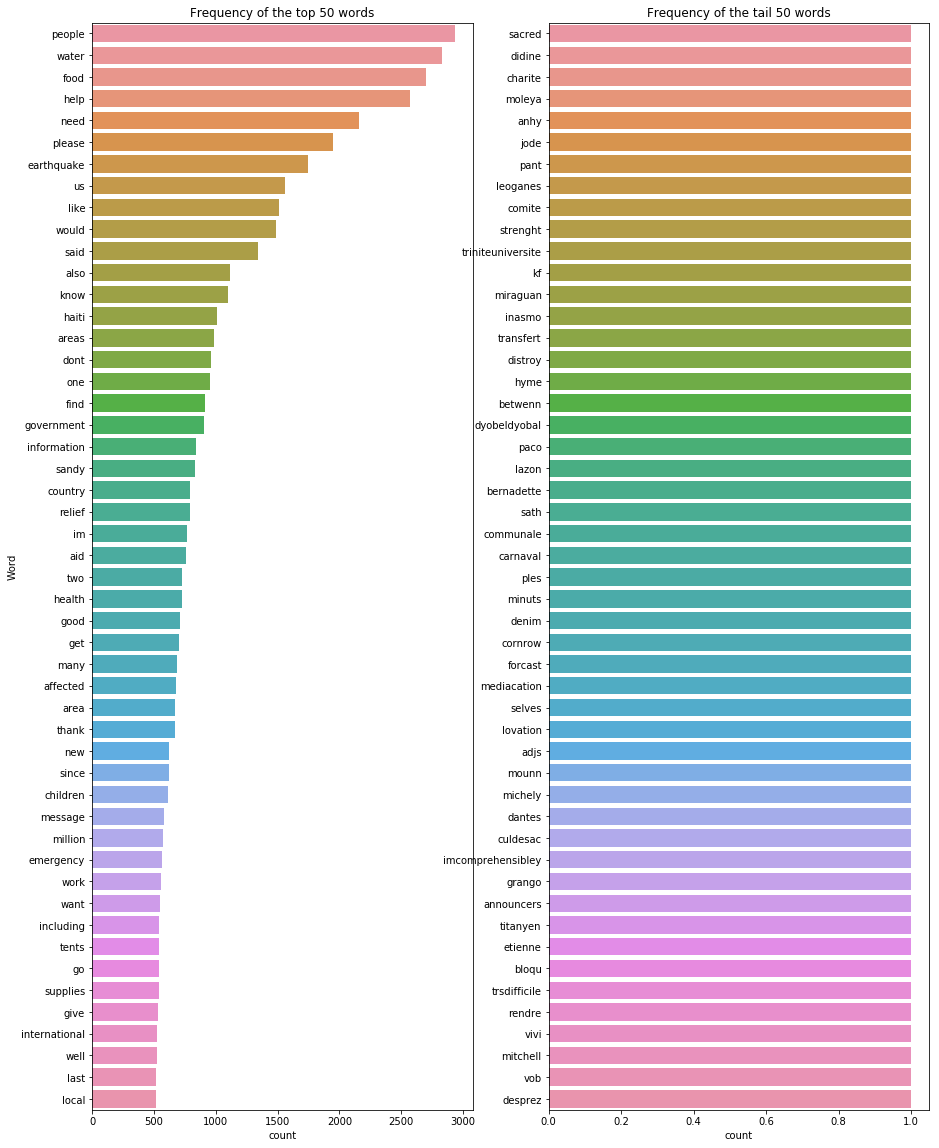

In [26]:
X1=pd.DataFrame(X)
g=freq_words(X1['message'])

In [21]:
g

,word,count
13,the,32790
43,and,18535
67,to,17741
39,of,16934
60,in,16118
2,a,9921
64,i,7165
19,for,6554
12,is,5645
59,are,4924


The above plot shows, the Top50 words, sorted by occurance as well as the Tail50 words. There are a lot of stopwords, which schould be removed. This is going to be done as part of my Machine Learning pipeline. Removing Punctuation and Digits should also be included into the pipeline!  

### 2. Write a tokenization function to process your text data

In [18]:
def tokenize(x,plot=False):
    '''
    Input: 
    Text column
    
    Output:
    tokenized and cleaned text
    
    '''
    word = ' '.join([text for text in x])
    # remove Punctuation
    word = re.sub(r'[^\w\s]','',word)
    # remove digits
    word = re.sub("\d+", " ", word)
    # lower words
    word = word.lower()
    # tokenize
    tokens = nltk.word_tokenize(word) 
    
    # removing stopwords 
    tokens_stop=[i for i in tokens if not i in stop_english]
    
    # lemmatizer 
    lemmatizer = WordNetLemmatizer()
         
    # lemmatize tokens 
    tokens_clean=[]
    
    for t in tokens_stop:
        clean=lemmatizer.lemmatize(t)
        tokens_clean.append(clean)  
      
    
    
    if plot==True: 
        # Creating df for Plot
        df=pd.DataFrame(tokens_clean)[0].value_counts().rename_axis('word').reset_index().head(50)
        
        plt.figure(figsize=(15,20))
        unique_plot = sns.barplot(data=df, x= 0, y = "word") 
        #d_plot.set(ylabel = 'Word') 
        plt.title('Frequency of the top 50 Words - cleaned')
        plt.show();
    
    
    return tokens_clean

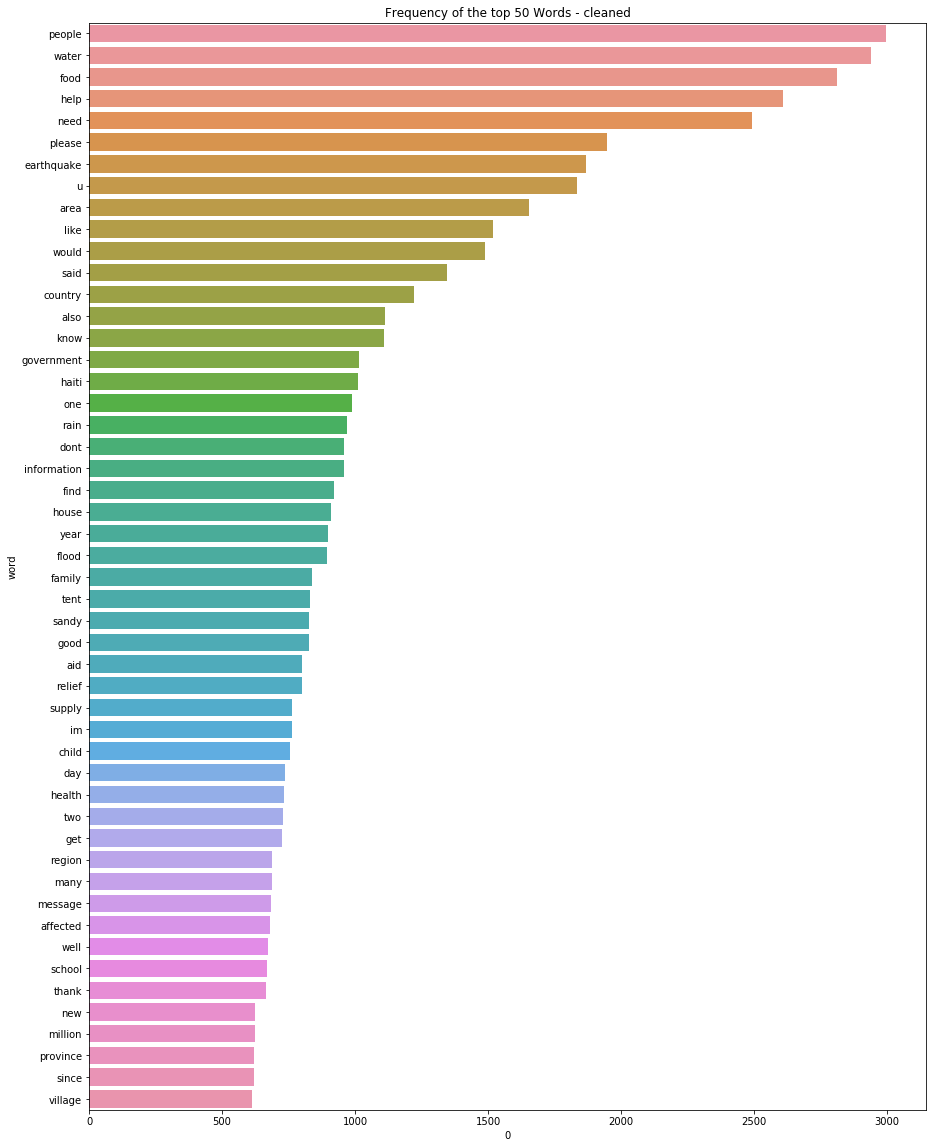

['weather',
 'update',
 'cold',
 'front',
 'cuba',
 'could',
 'pas',
 'haiti',
 'hurricane',
 'looking',
 'someone',
 'name',
 'un',
 'report',
 'leogane',
 'destroyed',
 'hospital',
 'st',
 'croix',
 'functioning',
 'need',
 'supply',
 'desperately',
 'say',
 'west',
 'side',
 'haiti',
 'rest',
 'country',
 'today',
 'tonight',
 'information',
 'national',
 'palace',
 'storm',
 'sacred',
 'heart',
 'jesus',
 'please',
 'need',
 'tent',
 'water',
 'silo',
 'thank',
 'would',
 'like',
 'receive',
 'message',
 'thank',
 'croixdesbouquets',
 'health',
 'issue',
 'worker',
 'santo',
 'area',
 'croixdesbouquets',
 'there',
 'nothing',
 'eat',
 'water',
 'starving',
 'thirsty',
 'petionville',
 'need',
 'information',
 'regarding',
 'thomassin',
 'number',
 'area',
 'named',
 'pyron',
 'would',
 'like',
 'water',
 'thank',
 'god',
 'fine',
 'desperately',
 'need',
 'water',
 'thanks',
 'let',
 'together',
 'need',
 'food',
 'delma',
 'didine',
 'area',
 'information',
 'number',
 'order',
 '

In [15]:
tokenize(X1['message'],plot=True)

In [16]:
# Converting to arrays 
X_val=X.values
Y_val=Y.values

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [19]:
# Building Pipeline
pipeline = Pipeline([
    ('vect',CountVectorizer(tokenizer=tokenize,lowercase=False)),
    ('tfidf',TfidfTransformer()),
    ('clf',MultiOutputClassifier(RandomForestClassifier(n_jobs=-1)))    
])

In [20]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=False, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7f25e6b028c8>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
               oob_score=False, random_state=Non

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [21]:
X_val=X.values
Y_val=Y.values

In [22]:
# Splitting Data
X_train, x_test , Y_train ,y_test = train_test_split(X,Y, test_size=0.25)

In [23]:
# Fitting pipeline 
modelfit=pipeline.fit(X_train,Y_train)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [22]:
y_pred=modelfit.predict(x_test)

In [12]:
def model_test(label_names,y_test,y_pred):
    '''
    Input: 
    
    label_names: Extracted Labels for metrics_measurement
    y_test: y-test array 
    y_pred: y_array with predicted reuslts 


    '''
    # Lists for metrics
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    # iterate over scores
    
    for i in range(len(label_names)):
        
            accuracy = accuracy_score(y_test[label_names[i]].values, y_pred[:,i])
            precision = precision_score(y_test[label_names[i]].values, y_pred[:,i],average='weighted')
            recall = recall_score(y_test[label_names[i]].values, y_pred[:,i],average='weighted')
            f1 = f1_score(y_test[label_names[i]].values, y_pred[:,i],average='weighted') 
            
     # append to lists 
    
            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
            
    # create dictionary 
    
    
    scores = {'Label Names':label_names,'Accuracy':accuracy_list, 'Precision':precision_list, 
              'Recall':recall_list,'F1':f1_list}  
    
    # Create Dataframe
    df=pd.DataFrame.from_dict(scores)
    
    # Create overall scores
    
    acc=df['Accuracy'].mean()
    f1=df['F1'].mean()
    rec=df['Recall'].mean()
    prec=df['Precision'].mean()
    
    
    # Print 
    for i in df.columns:
        if i!='Label Names':
            print ('The overall {} score is {:.2%}'.format(i,round(df[i].mean(),6)))  
    
    return df,acc,f1,rec,prec

In [24]:
df_test,accuracy,f1,recall,precision=model_test(label_names,y_test,y_pred)

The overall Accuracy score is 0.929356
The overall Precision score is 0.908271
The overall Recall score is 0.929356
The overall F1 score is 0.90859


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
df_test

,Label Names,Accuracy,Precision,Recall,F1
0,related,0.741990,0.704153,0.741990,0.714623
1,request,0.827586,0.785569,0.827586,0.781217
2,offer,0.995575,0.991473,0.995575,0.993520
3,aid_related,0.620537,0.607867,0.620537,0.600336
4,medical_help,0.917608,0.875705,0.917608,0.880788
5,medical_products,0.950717,0.928766,0.950717,0.927294
6,search_and_rescue,0.972536,0.945826,0.972536,0.958995
7,security,0.982453,0.965512,0.982453,0.973909
8,military,0.966738,0.934872,0.966738,0.950538
9,child_alone,1.000000,1.000000,1.000000,1.000000


### 6. Improve your model
Use grid search to find better parameters. 

In [26]:
def grid_rf(X_train, Y_train):
    '''
    Input: 
    X_train = x_sample of split 
    Y_train = y_sample of split 
    
    Return: 
    
    best mae of gridsearch and best params of gridsearch 
    '''
    

    
    pipeline = Pipeline([
    ('vect',CountVectorizer(tokenizer=tokenize,lowercase=False)),
    ('tfidf',TfidfTransformer()),
    ('clf',MultiOutputClassifier(RandomForestClassifier(n_jobs=-1))) 
    ])
        
    
    param_grid = { 
            "clf__estimator__min_samples_split": [2,4],
            "clf__estimator__criterion": ["gini","entropy"],
            'clf__estimator__max_depth': [25,50],
            "clf__estimator__max_features"      : ["auto"]
            }
    

    
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)

    grid.fit(X_train, Y_train)
    

    return grid.best_score_ , grid.best_params_

In [27]:
# Using my GreadSearch function to find the best params 
start=time.time()
best_score , best_params= grid_rf(X_train, Y_train)
end=time.time()
print("Calculation time of GridSearch was {:.2f} Minutes ".format((end-start)/60))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 
[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.1638693927372597, total=  49.8s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.15730851388465059, total=  52.2s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.16661580714067745, total=  50.3s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.3min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.15227342081171805, total=  49.3s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.4min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.1547146780592005, total=  51.0s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.5min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.1449496490692707, total=  49.4s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.6min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.17699115044247787, total=  50.6s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  7.7min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.16859932865425695, total=  53.1s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  8.8min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2, score=0.17119316447970706, total=  51.4s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  9.9min remaining:    0.0s


[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.15807140677448886, total=  49.6s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 
[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.1628013426914861, total=  52.2s
[CV] clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4 
[CV]  clf__estimator__criterion=gini, clf__estimator__max_depth=50, clf__estimator__max_features=auto, clf__estimator__min_samples_split=4, score=0.15654562099481234, total=  50.3s
[CV] clf__estimator__criterion=entropy, clf__estimator__max_depth=25, clf__estimator__max_features=auto, clf__estimator__min_samples_split=2 
[CV]  clf__estimator__criterion=entrop

[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 27.8min finished


Calculation time of GridSearch was 29.27 Minutes 


In [28]:
best_params, best_score

({'clf__estimator__criterion': 'entropy',
  'clf__estimator__max_depth': 50,
  'clf__estimator__max_features': 'auto',
  'clf__estimator__min_samples_split': 2},
 0.17266809073339437)

In [29]:
# Rerunning model with best params 
modelfit_opt=pipeline.fit(X_train,Y_train).set_params(**best_params)

In [143]:
# Predicting optimized 
y_pred_opt=modelfit_opt.predict(x_test)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [32]:
df_test_opt,accuracy_opt,f1_opt,recall_opt,precision_opt=model_test(label_names,y_test,y_pred_opt)

The overall Accuracy score is 0.929479
The overall Precision score is 0.908027
The overall Recall score is 0.929479
The overall F1 score is 0.908805


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [76]:
filename = 'rf_classifier.sav'
pickle.dump(modelfit_opt, open(filename, 'wb'))

In [26]:
obj = pd.read_pickle(r'rf_classifier.sav')

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [30]:
print(obj.predict(["test test"]))

[[1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
class dummy_creator (BaseEstimator, TransformerMixin) : 
    def __init__(self,df):
        self.df = df
             
    def pr (self):
        self.columns= self.columns
        return self.columns

    def test (self):
        ls=[]
        string_list=['id','message','original']   
        for i in self.columns:
            st=self[i].value_counts().count()  
            if i not in string_list and st>2:
                ls.append(i)
            
        self.list = ls
        
    def dummy (self):
        self.new =pd.get_dummies(self, columns=self.list)
        return self.new
       